## Step 1: Load a Pre-trained Model

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random

## NOTE:
##### When testing a pre-trained model like ResNet50, which has been trained on a large dataset such as ImageNet, you have a wide range of image categories you can test on. ImageNet itself contains over a million images categorized into 1000 classes, covering a broad spectrum of objects, animals, scenes, and even abstract concepts. Here are some categories and examples of images you can test the pre-trained model on:

Animals: Dogs, cats, birds, fish, horses, and various wildlife. Animal images are a good test case because models like ResNet50 are generally very good at distinguishing between different species.

Vehicles: Cars, trucks, airplanes, bicycles, boats. These images help test the model's ability to recognize man-made objects with specific shapes and features.

Everyday Objects: Furniture (chairs, tables), electronics (phones, TVs), and household items (dishes, tools). These objects can vary greatly in shape and size, offering a challenge to the model's classification capabilities.

Natural Scenes: Mountains, rivers, forests, beaches. While less about object recognition, these images test the model's ability to classify broader scenes and landscapes.

People: Images of people, including portraits or groups, performing various activities. Note that while pre-trained models can recognize people, their ability to interpret specific actions or emotions can be limited.

Food: Different types of meals, fruits, vegetables, and beverages. Food images are diverse and colorful, presenting a unique challenge for classification.

Art and Abstract Images: Paintings, sculptures, or abstract patterns. These images can be used to test the model's ability to handle non-photorealistic images, though they might be more challenging to classify accurately.

Signs and Text: Street signs, book covers, or any images with prominent text. While not the primary focus of models like ResNet50, they can sometimes recognize and categorize images based on readable text.

## Step 2: Create a Simple Adversarial Patch
#### Creating a simple adversarial path designed to disrupt the classifcation. Starting with a simple solid color or random noise pattern

In [21]:
# Load the pre-trained model
model = ResNet50(weights='imagenet')

In [22]:
import numpy as np
from PIL import Image

def create_random_patch(patch_size):
    """Create a simple adversarial patch as an example."""
    patch = np.uint8(np.random.rand(patch_size, patch_size, 3) * 255)  # Random noise patch
    return Image.fromarray(patch, 'RGB')

## Step 3: Verify Model Classification Before Patch Application

#### Before applying the adversarial patch and testing the attack, it's important to check how the model classifies the original, unmodified image. This will serve as a baseline to understand the impact of the adversarial patch.

In [23]:
original_image = Image.open('_images/bananas1.JPG')

def classify_image(model, img):
    """Classify the image using the model and print the top 3 predictions."""
    img = img.resize((224, 224))  # Resize the image to match the model's expected input
    img_array = image.img_to_array(img)  # Convert the image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    preds = model.predict(img_array)  # Predict the class of the image
    return decode_predictions(preds, top=3)[0]  # Return the top 3 predicted classes

# Load your original image
original_image = Image.open('_images/bananas1.JPG')

# Assuming original_image is a PIL Image object
classify_image(model, original_image)

1/1 [==============================] - 1s 806ms/step


[('n07753592', 'banana', 0.9067172),
 ('n07716906', 'spaghetti_squash', 0.015746422),
 ('n07717410', 'acorn_squash', 0.01416953)]

## Step 4: Apply the Patch to the Image

#### choose the image that we want to classify and apply the adversarial patch to it in a random or specific location

In [24]:
def apply_patch_to_image(original_image, patch, position=(0, 0)):
    """
    Apply the adversarial patch to the original image.

    Parameters:
    - original_image: PIL.Image object.
    - patch: A numpy array or a PIL.Image object representing the adversarial patch.
    - position: A tuple (x, y) representing where to place the patch on the original image.

    Returns:
    - A new PIL.Image object with the patch applied.
    """
    if isinstance(patch, np.ndarray):
        patch = Image.fromarray(patch)
    patched_image = original_image.copy()
    patched_image.paste(patch, position)
    return patched_image

# Method for randomly choosing the position for which the patch will be applied
def get_random_position(original_image, patch_size):
    """Generate a random position for the patch within the bounds of the original image."""
    max_x = original_image.width - patch_size
    max_y = original_image.height - patch_size
    if max_x < 0 or max_y < 0:
        raise ValueError("Patch size is too large for the given image.")
    x = random.randint(0, max_x)
    y = random.randint(0, max_y)
    return (x, y)

## Step 5: Main Experiment
#### Pass the patched image through the pre-trained model to see if the patch has successfully fooled the model. 

In [25]:
def display_images(original_image, patched_image):
    """
    Display the original and patched images side by side.

    Parameters:
    - original_image: PIL.Image object of the original image.
    - patched_image: PIL.Image object of the patched image.
    """
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(patched_image)
    plt.title('Patched Image')
    plt.axis('off')
    
    plt.show()

1/1 [==============================] - 0s 75ms/step

Patch Size: 50, Random Position: (127, 442)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n07753592', 'banana', 0.83645266), ('n07717410', 'acorn_squash', 0.027421463), ('n07716906', 'spaghetti_squash', 0.021153726)]


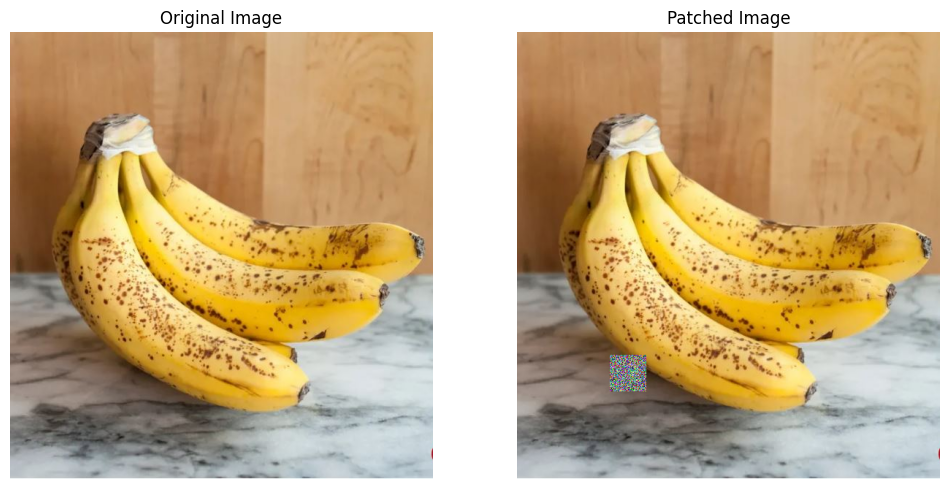

1/1 [==============================] - 0s 80ms/step

Patch Size: 100, Random Position: (150, 163)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n07753592', 'banana', 0.92936844), ('n03047690', 'clog', 0.023584064), ('n07716906', 'spaghetti_squash', 0.0062000505)]


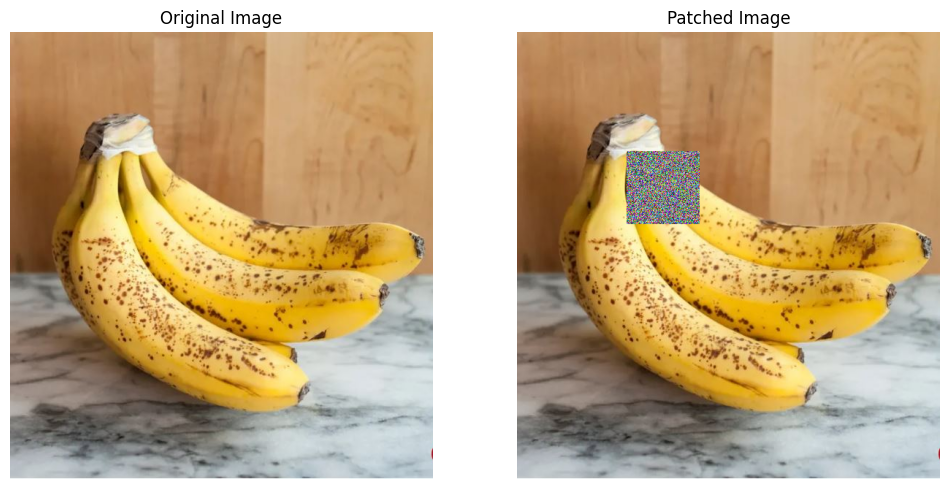

1/1 [==============================] - 0s 74ms/step

Patch Size: 150, Random Position: (385, 169)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n07753592', 'banana', 0.8429455), ('n07716906', 'spaghetti_squash', 0.019088505), ('n07717410', 'acorn_squash', 0.017282559)]


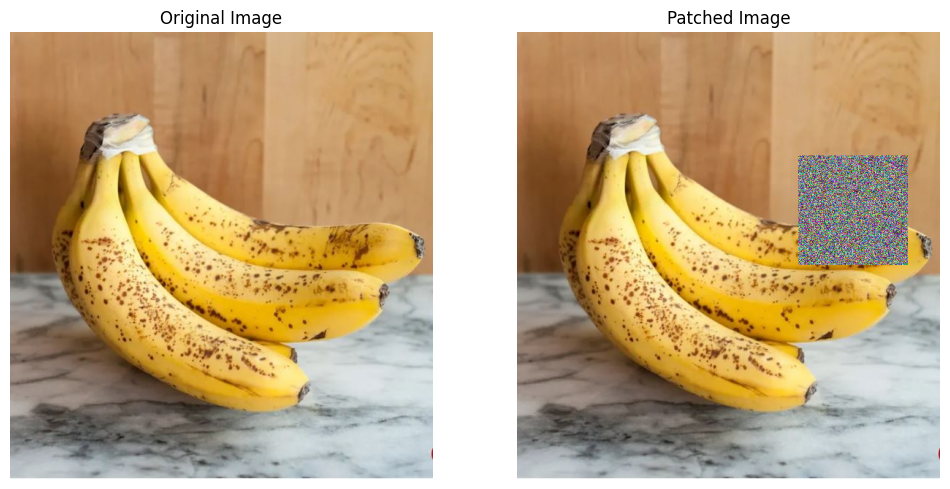

1/1 [==============================] - 0s 83ms/step

Patch Size: 200, Random Position: (141, 244)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n07753592', 'banana', 0.8948273), ('n03047690', 'clog', 0.101185605), ('n07716906', 'spaghetti_squash', 0.00043506856)]


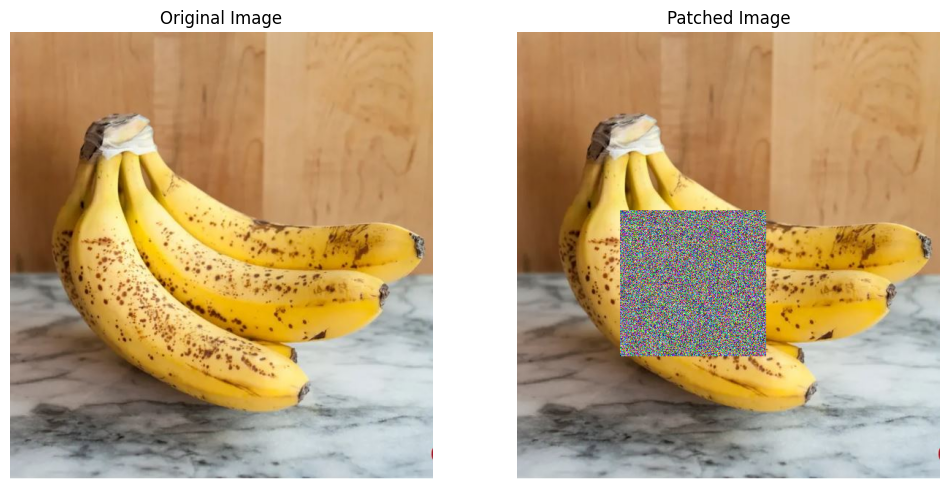

1/1 [==============================] - 0s 77ms/step

Patch Size: 250, Random Position: (202, 144)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n07753592', 'banana', 0.9227684), ('n03047690', 'clog', 0.0066276994), ('n03179701', 'desk', 0.0046835663)]


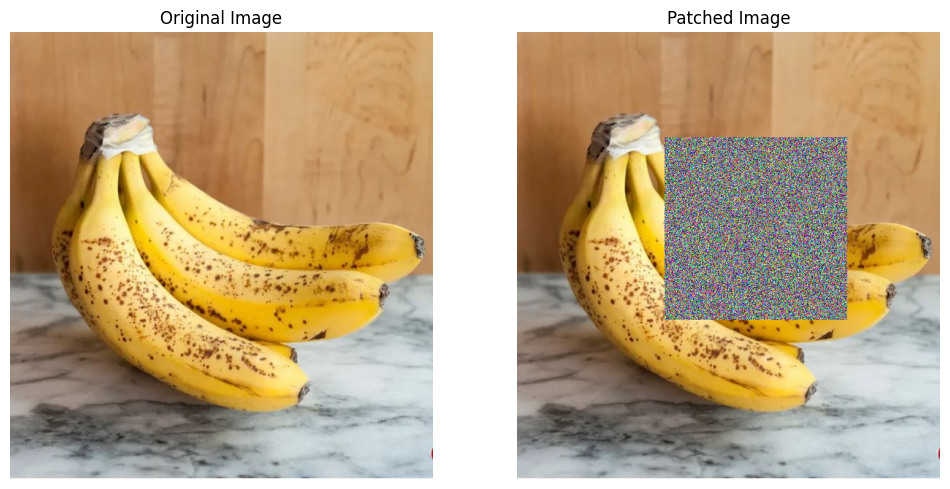

1/1 [==============================] - 0s 79ms/step

Patch Size: 300, Random Position: (32, 300)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n07753592', 'banana', 0.99899405), ('n03047690', 'clog', 0.0002747887), ('n07717556', 'butternut_squash', 0.00020808255)]


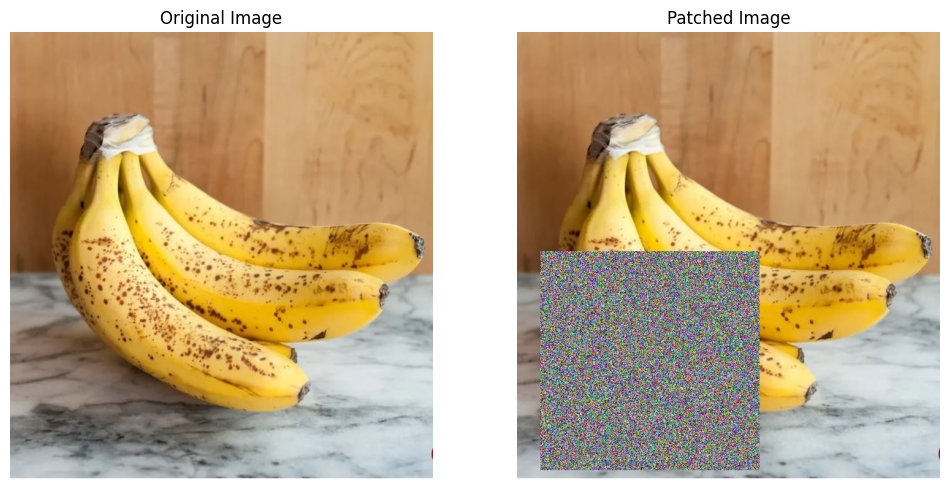

1/1 [==============================] - 0s 81ms/step

Patch Size: 350, Random Position: (227, 4)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n07753592', 'banana', 0.98410654), ('n07747607', 'orange', 0.0022975523), ('n07749582', 'lemon', 0.0007497698)]


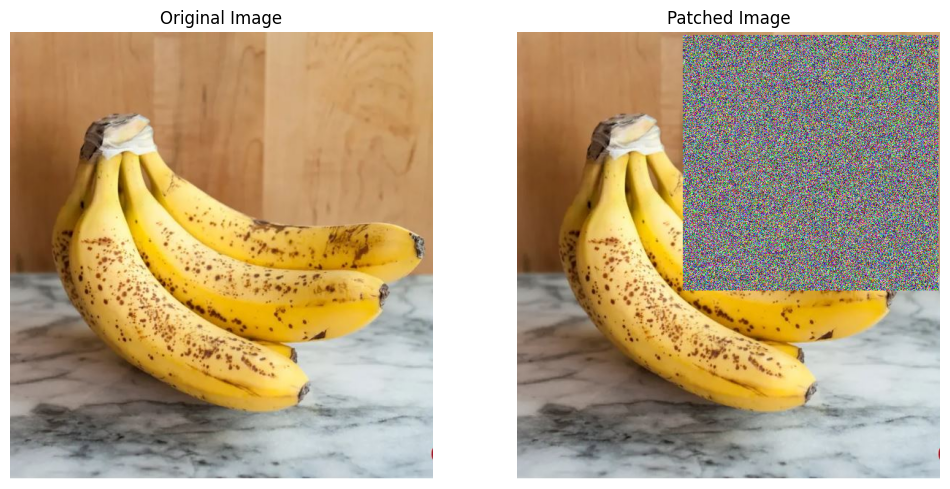

1/1 [==============================] - 0s 79ms/step

Patch Size: 400, Random Position: (106, 112)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n04208210', 'shovel', 0.058807146), ('n03127925', 'crate', 0.040468127), ('n02971356', 'carton', 0.02930671)]


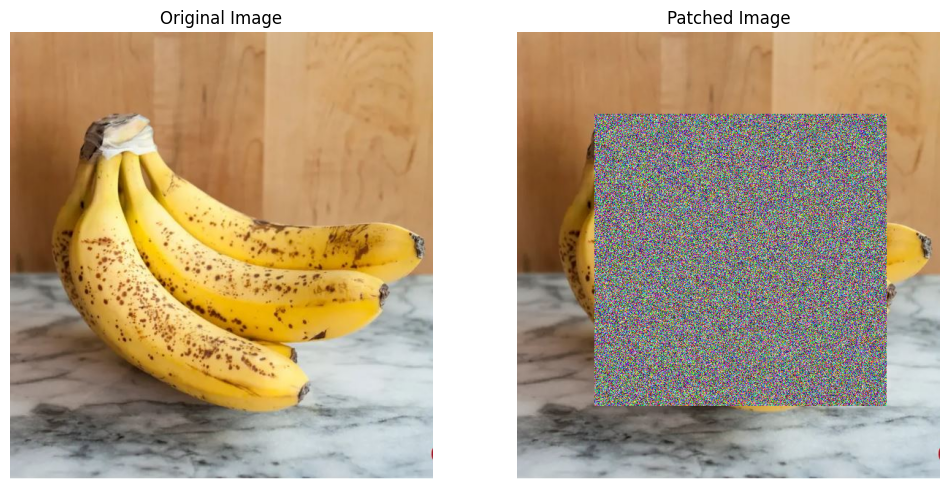

1/1 [==============================] - 0s 74ms/step

Patch Size: 450, Random Position: (20, 153)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n02840245', 'binder', 0.23025995), ('n03291819', 'envelope', 0.07711813), ('n03691459', 'loudspeaker', 0.04861321)]


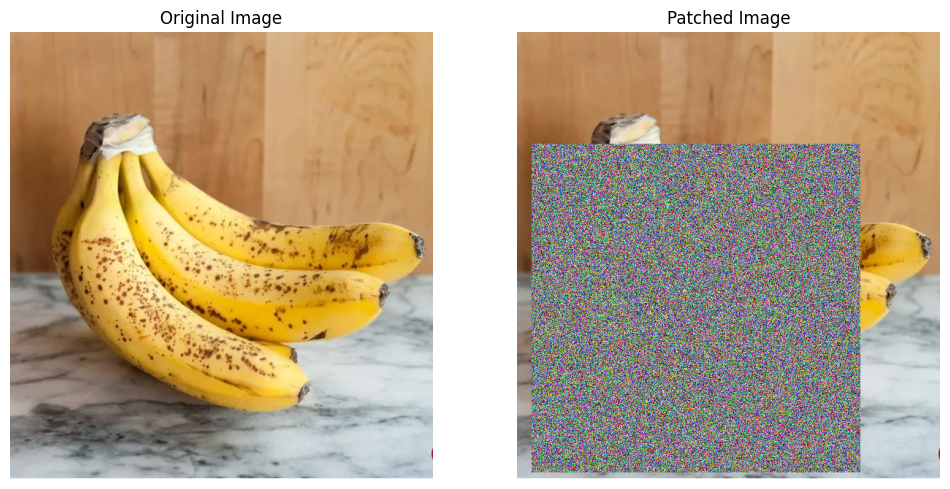

1/1 [==============================] - 0s 76ms/step

Patch Size: 500, Random Position: (3, 43)
Original Image Predictions: [('n07753592', 'banana', 0.9067172), ('n07716906', 'spaghetti_squash', 0.015746422), ('n07717410', 'acorn_squash', 0.01416953)]
Patched Image Predictions: [('n02840245', 'binder', 0.16445434), ('n04548362', 'wallet', 0.14976408), ('n03291819', 'envelope', 0.05480868)]


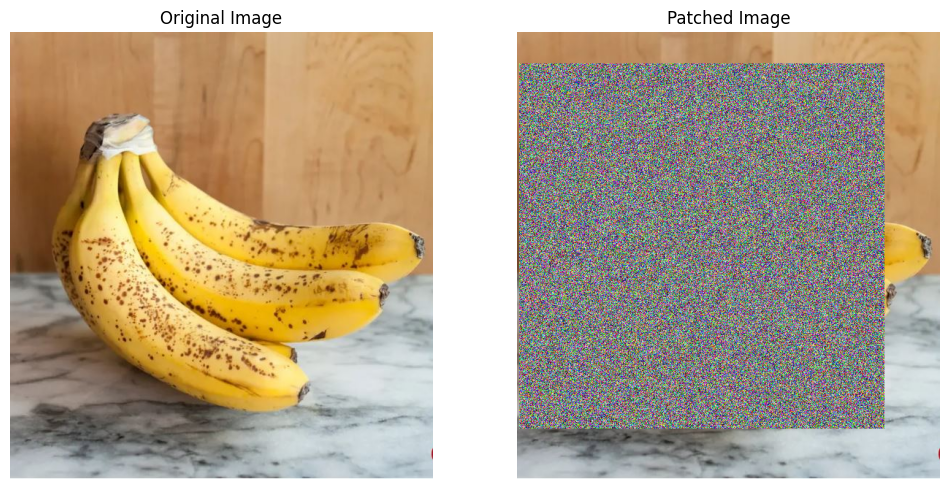

In [26]:
# Main Experiment Procedure
original_image_path = '_images/bananas1.JPG'
original_image = Image.open(original_image_path)

# Systematic Testing with 10 Patch Sizes Incremented by 50
for i in range(1, 11):
    patch_size = i * 50  # Patch sizes: 50, 100, 150, ..., 500
    position = get_random_position(original_image, patch_size)  # Generate random position
    patch = create_random_patch(patch_size)  # Create patch
    patched_image = apply_patch_to_image(original_image, patch, position)  # Apply patch to image
    
    # Classify and analyze
    original_preds = classify_image(model, original_image)
    patched_preds = classify_image(model, patched_image)
    
    print(f"\nPatch Size: {patch_size}, Random Position: {position}")
    print("Original Image Predictions:", original_preds)
    print("Patched Image Predictions:", patched_preds)
    
    # Optionally display the images to visually compare
    display_images(original_image, patched_image)